# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#build the url to access information
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

#create lists for needed info
city_name = []
city_id = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_spd = []
country = []
date = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_id.append(response["id"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_spd.append(response["wind"]["speed"])
        date.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | myaundzha
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | rassvet
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | guinguineo
Processing Record 17 of Set 1 | flin flon
Processing Record 18 of Set 1 | henties bay
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | pedasi
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather = pd.DataFrame({    
    "ID" : city_id,
    "City" : city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : temp,
    "Humidity" : humidity,
    "Cloudiness" : clouds,
    "Wind Speed" : wind_spd,
    "Country" : country,
    "Date" : date
})

city_weather

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,5848280,Kapaa,22.0752,-159.3190,27.99,75,75,5.14,US,1660019555
1,2127202,Anadyr,64.7500,177.4833,11.28,53,0,4.00,RU,1660019488
2,964420,Port Elizabeth,-33.9180,25.5701,13.16,97,0,3.60,ZA,1660019557
3,2738381,Lata,40.1629,-8.3327,15.17,90,0,0.09,PT,1660019560
4,4031574,Provideniya,64.3833,-173.3000,14.06,51,0,2.00,RU,1660019561
...,...,...,...,...,...,...,...,...,...,...
544,3984997,San Quintín,30.4833,-115.9500,23.16,74,3,2.92,MX,1660020411
545,3351663,Benguela,-12.5763,13.4055,19.13,86,2,1.98,AO,1660020412
546,2194098,Ahipara,-35.1667,173.1667,13.58,84,9,1.90,NZ,1660020416
547,2026861,Berdigestyakh,62.0989,126.6992,19.51,64,100,4.17,RU,1660020418


In [6]:
#use the .describe function
city_weather[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,19.355252,9.388394,20.702295,70.329690,52.577413,3.466066
std,32.961751,91.623126,7.493045,20.449302,39.469751,2.421009
min,-54.800000,-179.166700,-1.430000,1.000000,0.000000,0.000000
25%,-8.118100,-70.143100,15.210000,59.000000,6.000000,1.610000
50%,21.545300,13.733300,21.620000,75.000000,61.000000,2.830000
75%,46.833300,86.146900,26.510000,86.000000,93.000000,4.770000
max,78.218600,179.316700,39.330000,100.000000,100.000000,13.720000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.

#NO CITIES OVER 100% HUMIDITY

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

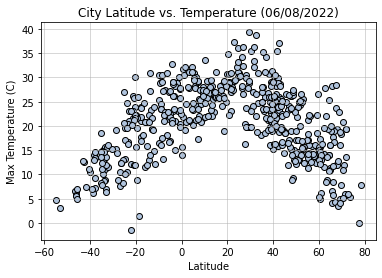

In [13]:
plt.scatter(lat, temp, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Temperature (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("Images/lat_vs_temp.png")

## Latitude vs. Humidity Plot

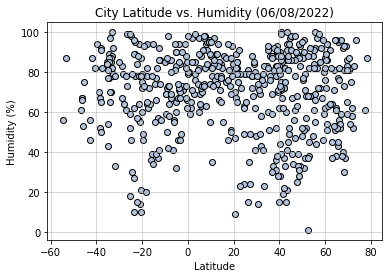

In [14]:
plt.scatter(lat, humidity, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("Images/lat_vs_humid.png")

## Latitude vs. Cloudiness Plot

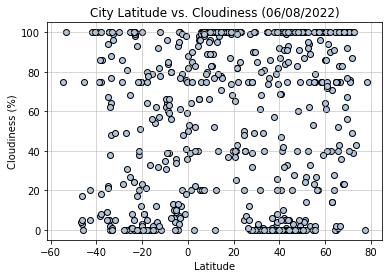

In [15]:
plt.scatter(lat, clouds, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("Images/lat_vs_clouds.png")

## Latitude vs. Wind Speed Plot

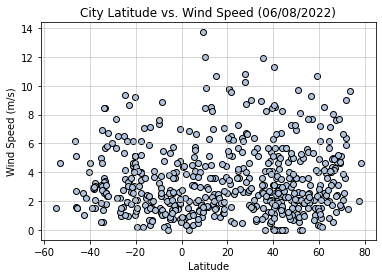

In [16]:
plt.scatter(lat, wind_spd, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("Images/lat_vs_windspd.png")

## Linear Regression

In [11]:
nth_hem = city_weather.loc[city_weather["Lat"] >=0]
sth_hem = city_weather.loc[city_weather["Lat"] <0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39418994760464093


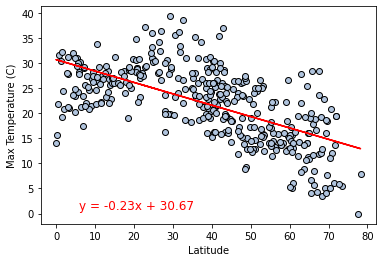

In [52]:
x_values = nth_hem["Lat"]
y_values = nth_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5401930963291343


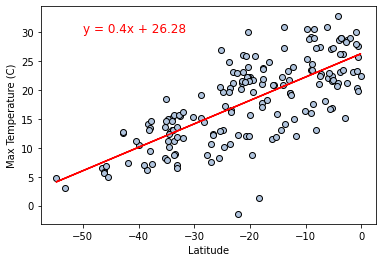

In [53]:
x_values = sth_hem["Lat"]
y_values = sth_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016078723339913545


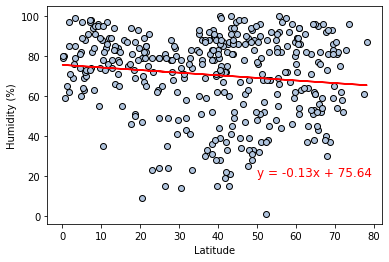

In [54]:
x_values = nth_hem["Lat"]
y_values = nth_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008267121914098074


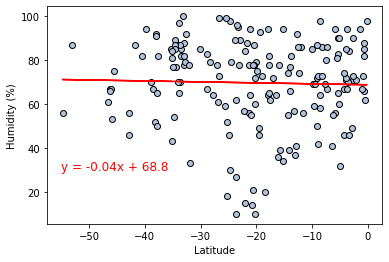

In [55]:
x_values = sth_hem["Lat"]
y_values = sth_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012899578130629476


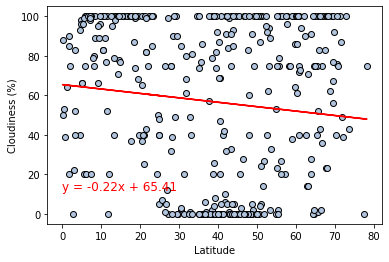

In [56]:
x_values = nth_hem["Lat"]
y_values = nth_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0008595474110162313


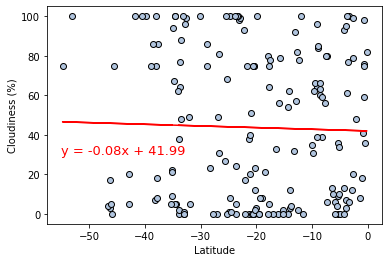

In [57]:
x_values = sth_hem["Lat"]
y_values = sth_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00019338794895745805


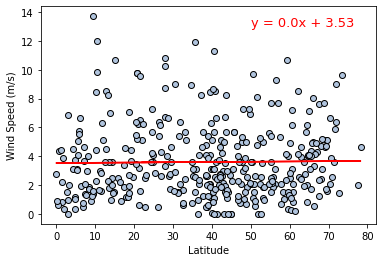

In [58]:
x_values = nth_hem["Lat"]
y_values = nth_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,13),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01795831931406304


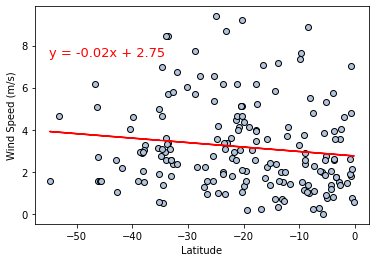

In [59]:
x_values = sth_hem["Lat"]
y_values = sth_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,7.5),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()